# Summary of apprenticeships data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_json('step2b.json')

### Overall summary

In [2]:
f"Total rows: {df.shape[0]} | columns: {df.shape[1]}"

'Total rows: 1062 | columns: 21'

Available columns of data:

In [3]:
print('\n'.join(list(df)))

approved_date
contact
data_updated
degree_type
employers_involved
endpoint_assessment
entry_requirements
expected_learnings
ifa_url
length
level
max_funding
name
professional_registration
qualifications
reference_code
route
source
status
suitable_job_roles
version


Data sources. Merged data shows multiple sources.

In [4]:
df.groupby(by=lambda s: str(df.source[s]))['name'].count()

['Find Apprenticeship Training']                                     505
['Institute for Apprenticeships', 'Find Apprenticeship Training']    273
['Institute for Apprenticeships']                                    284
Name: name, dtype: int64

### Status

In [5]:
df.groupby(by=['status'])['status'].count()

status
Approved for delivery    327
Decommissioned             3
In development           227
Name: status, dtype: int64

Missing data from status:

In [6]:
no_status = df[df.status.isna()]
total_rows = len(df)
assert len(no_status) + df.status.count() == total_rows
len(no_status)

505

### Max funding available

In [7]:
df.max_funding.describe()

count      833.000000
mean      8239.495798
std       7026.047912
min       1500.000000
25%       3000.000000
50%       6000.000000
75%      12000.000000
max      27000.000000
Name: max_funding, dtype: float64

Distribution of maximum funding available:

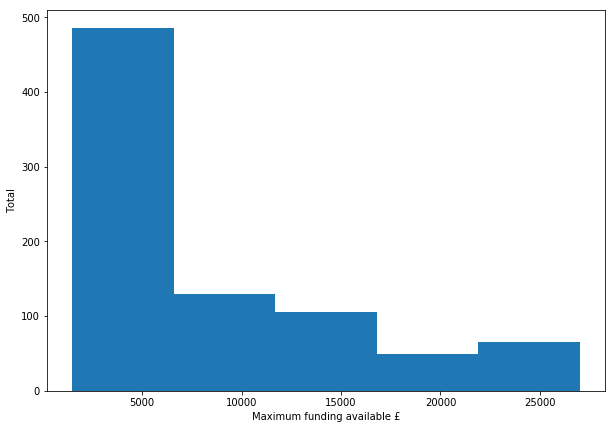

In [8]:
max_fund_no_na = df[~df.max_funding.isna()]

fig, ax = plt.subplots(figsize=(10, 7))
bins = 5
ax.hist(max_fund_no_na.max_funding, bins)
ax.set_xlabel('Maximum funding available £')
ax.set_ylabel('Total')
plt.show()

### Apprenticeship level

In [9]:
df.level.describe()

count    1062.000000
mean        3.259887
std         1.363407
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: level, dtype: float64

Missing data from level:

In [10]:
len(df[df.level == 0])

2

In [11]:
level_summary = df.groupby(by=['level'])['level'].count()
level_summary

level
0      2
2    341
3    428
4    121
5     45
6     88
7     37
Name: level, dtype: int64

Distribution of levels:

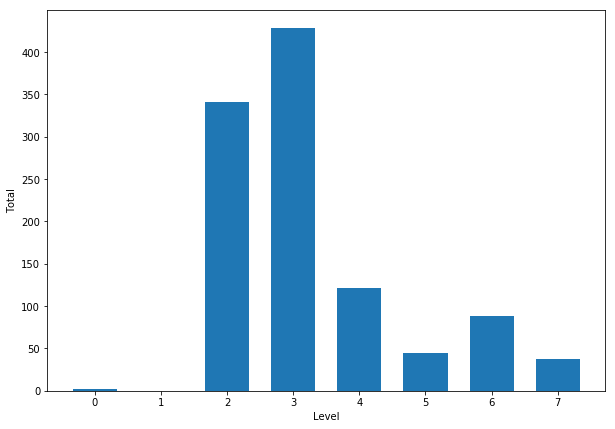

In [12]:
x = level_summary.index
y = list(level_summary)
width = 1/1.5
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel('Level')
ax.set_ylabel('Total')
ax.bar(x, y, width)
plt.show()

### Length of apprenticeship

In [13]:
df.length.describe()

count           843
unique           19
top       12 months
freq            262
Name: length, dtype: object

In [14]:
not_null_length = df[~df.length.isnull()]
df['length_months_int'] = df.apply(lambda row: int(row.length[:2]) if row.length else None, axis=1)
df.length_months_int.describe()

count    843.000000
mean      21.843416
std       11.106659
min       12.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       66.000000
Name: length_months_int, dtype: float64

In [15]:
length_summary = df.groupby(by=['length'])['length'].count()
length_summary

length
12 months    262
13 months      1
14 months      5
15 months     21
16 months      3
18 months    204
20 months      6
22 months      1
23 months      1
24 months    167
30 months     23
33 months      1
36 months     75
38 months      1
42 months     27
48 months     26
50 months      1
60 months     17
66 months      1
Name: length, dtype: int64

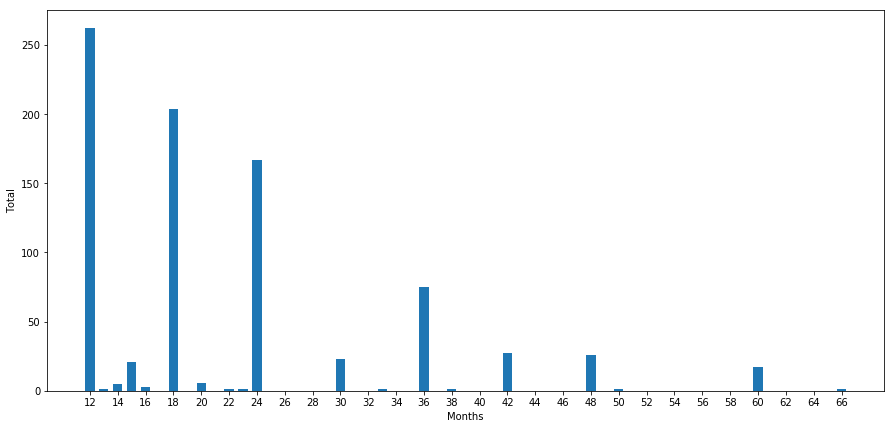

In [16]:
x = [int(m[:2]) for m in length_summary.index]
y = list(length_summary)
width = 1/1.5
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_ticks(np.arange(min(x), max(x)+1, 2.0))
ax.set_xlabel('Months')
ax.set_ylabel('Total')
ax.bar(x, y, width)
plt.show()